# Background

The goal is to build a search algorithm to find a random grain of rice. This will then be classified by variety before being binned to an orientation category. From here, the goal is to classify all images in each variety by orientation and display percentages and time involved.

The initial orientation binning will be vertical or not vertical, with vertical being defined as the grain within $\pm 30\degree$ of the vertical axis.

The dataset comes from [here](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset).

# Package Setup

In [51]:
import matplotlib.pyplot as plt
from skimage import color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.io import imread
from math import degrees

# Data Import and Prep

In [ ]:
image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (17).jpg')
image_gray = color.rgb2gray(image_rgb)

# Model Setup
## Search Algorithm

## Classification Algorithm

## Orientation Algorithm

[Orientation example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

[ellipse example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html)

In [33]:
# image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (1).jpg')
# image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (6).jpg')
# image_rgb = imread('Rice_Image_Dataset/Basmati/Basmati (12).jpg')
# image_rgb = imread('Rice_Image_Dataset/Basmati/Basmati (1).jpg')
# image_rgb = imread('Rice_Image_Dataset/Basmati/Basmati (3).jpg')
# image_rgb = imread('Rice_Image_Dataset/Ipsala/Ipsala (5).jpg')
# image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (10).jpg')
image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (17).jpg')


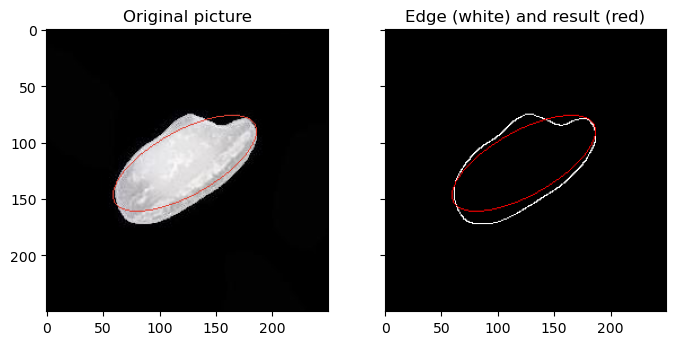

In [36]:
# Find the edges of the rice grain
edges = canny(image_gray, sigma = 2.0, low_threshold = 0.55, high_threshold = 0.8)

# Perform a Hough Ellipse Transform to find a valid elliptical approximation of the grain
# Threshold of 150 holds for a small sample of non-symmetrical rice grains
result = hough_ellipse(edges, accuracy = 20, threshold = 150)
result.sort(order = 'accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5] # This is what really matters for the program

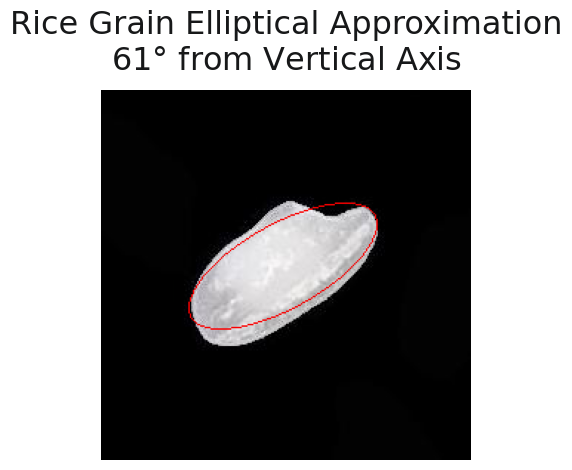

In [72]:
# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (250, 0, 0)

# Plot the rice grain and ellipse
# Future iteration should include whether or not this grain is "vertical" and varietal.
fig, ax = plt.subplots()
ax.set_title('Rice Grain Elliptical Approximation\n${:.0f}\\degree$ from Vertical Axis'.format((degrees(orientation) - 90)),
             fontsize = 23, pad = 15).set_color('#171819')
ax.imshow(image_rgb)
# https://stackoverflow.com/a/25864515/13801562
ax.axis('off')
plt.show()